In [15]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [16]:
# Chargement des données MNIST
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


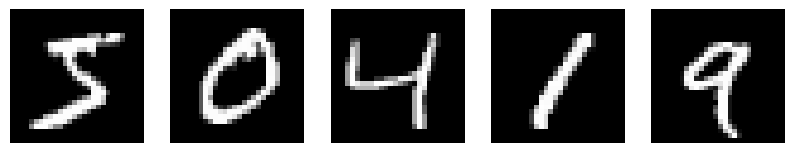

In [17]:
# Affichage de quelques images
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()


Taille des ensembles de données :
Train: (60000, 28, 28), Test: (10000, 28, 28)


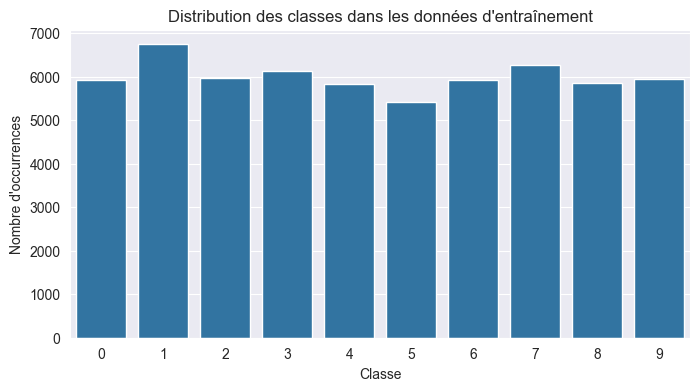

In [18]:
# Parcours et statistiques des données
print("Taille des ensembles de données :")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 4))
sns.barplot(x=unique, y=counts)
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des classes dans les données d'entraînement")
plt.show()


In [19]:
# Mise en forme des données
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0


In [20]:
# PCA pour réduction de dimension
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [21]:
# Modèle de régression logistique
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)
y_pred = log_reg.predict(X_test_pca)


In [22]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Logistic Regression): {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy (Logistic Regression): 0.9224
Confusion Matrix:
[[ 958    0    2    2    0    6    8    2    1    1]
 [   0 1110    3    2    0    1    4    2   13    0]
 [   7    8  927   14    6    6   13   11   32    8]
 [   4    2   19  912    0   31    1   12   20    9]
 [   2    2    7    2  912    0    9    3    8   37]
 [   8    3    6   37    9  773   15    6   28    7]
 [  12    3    7    1    8   11  912    2    2    0]
 [   1    6   26    6    7    1    0  950    1   30]
 [   8   10    5   26   10   33   11    8  858    5]
 [  11    6    1    9   32    7    0   24    7  912]]


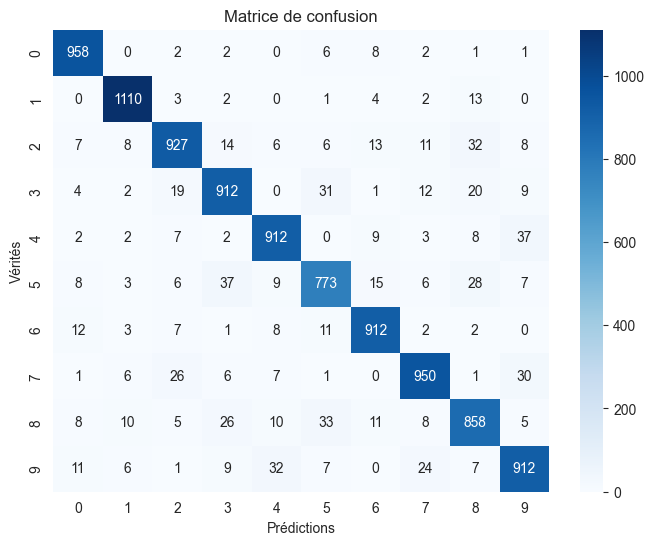

In [23]:
# Affichage de la matrice de confusion sous forme graphique
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()


In [24]:
# Entraînement d'un modèle de réseau de neurones
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2438 - accuracy: 0.9293 - val_loss: 0.1182 - val_accuracy: 0.9642
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9677 - val_loss: 0.0931 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0735 - accuracy: 0.9775 - val_loss: 0.0964 - val_accuracy: 0.9696
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.0987 - val_accuracy: 0.9711
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9856 - val_loss: 0.0823 - val_accuracy: 0.9745


In [25]:
# Sauvegarde du modèle
model.save("mnist_nn_model.keras")


In [26]:
# Prédictions du modèle
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 1ms/step


In [27]:
# Identification des erreurs de prédiction
erreurs = np.where(predicted_labels != y_test)[0]


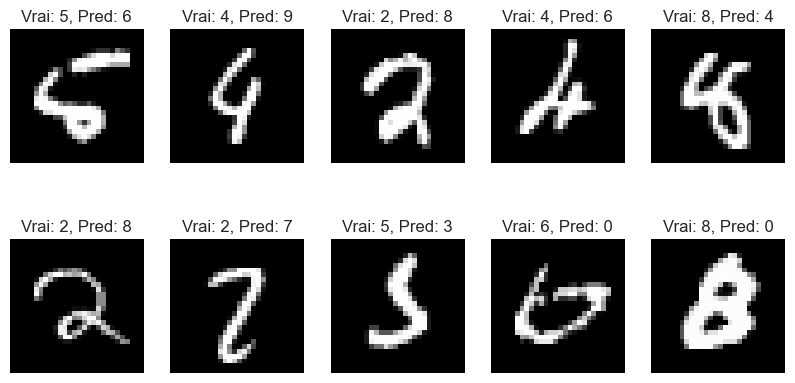

In [28]:
# Affichage de quelques erreurs
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    index = erreurs[i]
    ax.imshow(X_test[index].reshape(28, 28), cmap='gray')
    ax.set_title(f"Vrai: {y_test[index]}, Pred: {predicted_labels[index]}")
    ax.axis('off')
plt.show()
